In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
acct = pd.read_csv('Accounts.csv')
port = pd.read_csv('Portfolio_derived.csv')
call = pd.read_csv('Call_center.csv')

In [3]:
acct.head(2)

,Accounts Account Status,Accounts Angaza ID,Accounts Area,Accounts Country,Accounts Date of Disablement Utc Date,Accounts Date of Latest Payment Utc Date,Accounts Date of Registration Date,Accounts Days Disabled,Accounts Days to Cutoff,Accounts Disabled (Yes / No),Accounts Minimum Payment Amount,Accounts Minimum Payment Amount USD,Accounts Price per Day,Accounts Price per Day USD,Accounts Product Name,Accounts Region,Accounts Registering User Angaza ID,Accounts Unit Age Days,Accounts Unit Proportional Age,Accounts Unlock Price,Accounts Unlock Price USD,Accounts Upfront Days Included,Accounts Upfront Price,Accounts Upfront Price USD,Accounts Zone
0,DISABLED,AC524870,Moyo,Uganda,9/16/19,9/14/19,5/31/18,3.0,-3.17,Yes,550.0,0.146284,560.0,0.15,Pro,Nyanza,US010662,476.0,1.7,"195,080",52.0,7.0,"43,900",11.702750,West
1,ENABLED,AC514236,Songwe,Tanzania,9/21/19,9/18/19,5/22/18,NaN,2.30,No,1350.0,0.585138,1360.0,0.59,Home 120 Plus + Radio,South Rift,US018144,485.0,1.7,"425,675",185.0,7.0,"58,300",25.355959,West


#### Coverting Columns to float to enable Calculation

In [4]:
acct['Accounts Upfront Price'] = acct['Accounts Upfront Price'].str.replace('\D+', "").astype('float')
acct['Accounts Unlock Price'] = acct['Accounts Unlock Price'].str.replace('\D+', "").astype('float')

## Follow - On Revenue Realization Calculation

In [5]:
Followon_Revenue_realization =  (acct['Accounts Upfront Price'].sum() / acct['Accounts Unlock Price'].sum()) * 100

In [6]:
acct['Revenue_Realization'] = acct['Accounts Upfront Price'] / acct['Accounts Unlock Price']
acct['Revenue_Realization_rate'] = (acct['Accounts Upfront Price'] / acct['Accounts Unlock Price']) * 100

In [7]:
acct.head(3)

,Accounts Account Status,Accounts Angaza ID,Accounts Area,Accounts Country,Accounts Date of Disablement Utc Date,Accounts Date of Latest Payment Utc Date,Accounts Date of Registration Date,Accounts Days Disabled,Accounts Days to Cutoff,Accounts Disabled (Yes / No),Accounts Minimum Payment Amount,Accounts Minimum Payment Amount USD,Accounts Price per Day,Accounts Price per Day USD,Accounts Product Name,Accounts Region,Accounts Registering User Angaza ID,Accounts Unit Age Days,Accounts Unit Proportional Age,Accounts Unlock Price,Accounts Unlock Price USD,Accounts Upfront Days Included,Accounts Upfront Price,Accounts Upfront Price USD,Accounts Zone,Revenue_Realization,Revenue_Realization_rate
0,DISABLED,AC524870,Moyo,Uganda,9/16/19,9/14/19,5/31/18,3.0,-3.17,Yes,550.0,0.146284,560.0,0.15,Pro,Nyanza,US010662,476.0,1.7,195080.0,52.0,7.0,43900.0,11.702750,West,0.225036,22.503588
1,ENABLED,AC514236,Songwe,Tanzania,9/21/19,9/18/19,5/22/18,NaN,2.30,No,1350.0,0.585138,1360.0,0.59,Home 120 Plus + Radio,South Rift,US018144,485.0,1.7,425675.0,185.0,7.0,58300.0,25.355959,West,0.136959,13.695895
2,UNLOCKED,AC497334,Embu,Kenya,NaN,5/9/18,5/9/18,NaN,NaN,No,0.0,0.000000,0.0,NaN,Boom,Nairobi,US019955,498.0,NaN,4815.0,47.0,0.0,4800.0,46.811001,East,0.996885,99.688474


## Collection Performance In Areas of Account

<ul>

    -  Days Sales Outstanding
    -  Collection Effective Index 
    -  Average Day Deliquent 

</ul>

In [8]:
perf_df = acct[['Accounts Area', 'Accounts Unlock Price', 'Accounts Upfront Price']]
perf_df.head(2)

,Accounts Area,Accounts Unlock Price,Accounts Upfront Price
0,Moyo,195080.0,43900.0
1,Songwe,425675.0,58300.0


In [9]:
grpBy = perf_df.groupby(['Accounts Area']).sum()

In [10]:
grpBy['Total_Credit_Sales'] = grpBy['Accounts Unlock Price'] - grpBy['Accounts Upfront Price']
grpBy['Regular_DSO'] = grpBy['Accounts Unlock Price'] / grpBy['Total_Credit_Sales'] * 1
grpBy['Best_DSO'] = grpBy['Accounts Upfront Price'] / grpBy['Total_Credit_Sales'] * 1
grpBy['ADD'] = grpBy['Regular_DSO'] - grpBy['Best_DSO']

In [11]:
grpBy

,Accounts Unlock Price,Accounts Upfront Price,Total_Credit_Sales,Regular_DSO,Best_DSO,ADD
Accounts Area,,,,,,
Abuja,4769430.0,852500.0,3916930.0,1.217645,0.217645,1.0
Ado Ekiti,352135.0,61800.0,290335.0,1.212858,0.212858,1.0
Akinyele,1147490.0,171900.0,975590.0,1.176201,0.176201,1.0
Akure,289420.0,36400.0,253020.0,1.143862,0.143862,1.0
Arua,15111065.0,2739900.0,12371165.0,1.221475,0.221475,1.0
Arusha,13299490.0,1900100.0,11399390.0,1.166684,0.166684,1.0
Auchi,2518390.0,375200.0,2143190.0,1.175066,0.175066,1.0
Babati,3028045.0,794100.0,2233945.0,1.355470,0.355470,1.0
Bago,7359015.0,1023000.0,6336015.0,1.161458,0.161458,1.0


## Analysis on Call

In [12]:
call.head(3)

,April Collections Calls List Angaza ID,April Collections Calls List Date Called Date,April Collections Calls List Reachability
0,AC542518,4/15/19,Not Reached
1,AC542574,4/25/19,Not Reached
2,AC537471,4/18/19,Reached


In [13]:
call.shape

(1930, 3)

In [14]:
call.dropna(inplace = True)

In [15]:
print(call.shape)

(911, 3)


In [16]:
call[call.duplicated('April Collections Calls List Angaza ID')]

,April Collections Calls List Angaza ID,April Collections Calls List Date Called Date,April Collections Calls List Reachability
317,AC534122,4/27/19,Not Reached
553,AC550817,4/15/19,Not Reached
610,AC498766,4/12/19,Not Reached
715,AC499691,4/2/19,Not Reached


In [17]:
call[call['April Collections Calls List Angaza ID'] == 'AC550817']

,April Collections Calls List Angaza ID,April Collections Calls List Date Called Date,April Collections Calls List Reachability
184,AC550817,4/11/19,Not Reached
553,AC550817,4/15/19,Not Reached


In [18]:
call['April Collections Calls List Reachability'].value_counts()

Not Reached    649
Reached        262
Name: April Collections Calls List Reachability, dtype: int64

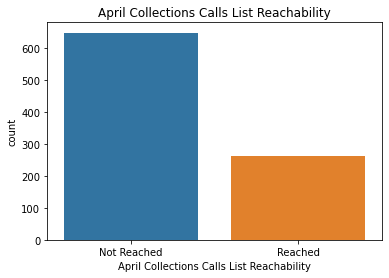

In [19]:
sns.countplot(call['April Collections Calls List Reachability'], data = call)
plt.title('April Collections Calls List Reachability');

#### Merge call_center and Account Data together

In [20]:
call_acct = pd.merge(call,acct, how = 'left', left_on = 'April Collections Calls List Angaza ID', right_on = 'Accounts Angaza ID')

In [21]:
call_acct.head(4)

,April Collections Calls List Angaza ID,April Collections Calls List Date Called Date,April Collections Calls List Reachability,Accounts Account Status,Accounts Angaza ID,Accounts Area,Accounts Country,Accounts Date of Disablement Utc Date,Accounts Date of Latest Payment Utc Date,Accounts Date of Registration Date,Accounts Days Disabled,Accounts Days to Cutoff,Accounts Disabled (Yes / No),Accounts Minimum Payment Amount,Accounts Minimum Payment Amount USD,Accounts Price per Day,Accounts Price per Day USD,Accounts Product Name,Accounts Region,Accounts Registering User Angaza ID,Accounts Unit Age Days,Accounts Unit Proportional Age,Accounts Unlock Price,Accounts Unlock Price USD,Accounts Upfront Days Included,Accounts Upfront Price,Accounts Upfront Price USD,Accounts Zone,Revenue_Realization,Revenue_Realization_rate
0,AC542518,4/15/19,Not Reached,DISABLED,AC542518,Kabarnet,Kenya,6/13/19,6/12/19,6/13/18,97.0,-97.13,Yes,60.0,0.548411,60.0,0.55,Home 60,West East,US022591,463.0,1.7,17000.0,166.0,7.0,1700.0,16.452329,NaN,0.100000,10.000000
1,AC542574,4/25/19,Not Reached,DISABLED,AC542574,Homa Bay,Kenya,8/2/19,8/1/19,6/13/18,47.0,-47.08,Yes,40.0,0.391338,40.0,0.39,Home 60,Southern Highlands,US019959,463.0,1.7,12495.0,122.0,7.0,1600.0,15.218715,NaN,0.128051,12.805122
2,AC537471,4/18/19,Reached,ENABLED,AC537471,Nyamira,Kenya,11/20/19,9/4/19,6/10/18,NaN,63.08,No,20.0,0.173928,20.0,0.17,Pro,Lake Zone,US002806,466.0,1.7,5735.0,56.0,7.0,900.0,8.696408,NaN,0.156931,15.693112
3,AC559761,4/23/19,Not Reached,DISABLED,AC559761,Narok,Kenya,11/18/18,11/16/18,6/27/18,305.0,-304.92,Yes,40.0,0.391338,40.0,0.39,Home 60,Coastal,US022404,449.0,1.6,12495.0,122.0,7.0,1600.0,15.218715,NaN,0.128051,12.805122


#### Drop duplicate Accounts with Multiple Trasanction date Record

In [22]:
call_acct_new = call_acct.drop_duplicates(subset = ['April Collections Calls List Angaza ID', 'April Collections Calls List Date Called Date'])

In [23]:
print(call_acct_new.shape)

(911, 30)


In [24]:
call_acct_new.head(5)

,April Collections Calls List Angaza ID,April Collections Calls List Date Called Date,April Collections Calls List Reachability,Accounts Account Status,Accounts Angaza ID,Accounts Area,Accounts Country,Accounts Date of Disablement Utc Date,Accounts Date of Latest Payment Utc Date,Accounts Date of Registration Date,Accounts Days Disabled,Accounts Days to Cutoff,Accounts Disabled (Yes / No),Accounts Minimum Payment Amount,Accounts Minimum Payment Amount USD,Accounts Price per Day,Accounts Price per Day USD,Accounts Product Name,Accounts Region,Accounts Registering User Angaza ID,Accounts Unit Age Days,Accounts Unit Proportional Age,Accounts Unlock Price,Accounts Unlock Price USD,Accounts Upfront Days Included,Accounts Upfront Price,Accounts Upfront Price USD,Accounts Zone,Revenue_Realization,Revenue_Realization_rate
0,AC542518,4/15/19,Not Reached,DISABLED,AC542518,Kabarnet,Kenya,6/13/19,6/12/19,6/13/18,97.0,-97.13,Yes,60.0,0.548411,60.0,0.55,Home 60,West East,US022591,463.0,1.7,17000.0,166.0,7.0,1700.0,16.452329,NaN,0.100000,10.000000
1,AC542574,4/25/19,Not Reached,DISABLED,AC542574,Homa Bay,Kenya,8/2/19,8/1/19,6/13/18,47.0,-47.08,Yes,40.0,0.391338,40.0,0.39,Home 60,Southern Highlands,US019959,463.0,1.7,12495.0,122.0,7.0,1600.0,15.218715,NaN,0.128051,12.805122
2,AC537471,4/18/19,Reached,ENABLED,AC537471,Nyamira,Kenya,11/20/19,9/4/19,6/10/18,NaN,63.08,No,20.0,0.173928,20.0,0.17,Pro,Lake Zone,US002806,466.0,1.7,5735.0,56.0,7.0,900.0,8.696408,NaN,0.156931,15.693112
3,AC559761,4/23/19,Not Reached,DISABLED,AC559761,Narok,Kenya,11/18/18,11/16/18,6/27/18,305.0,-304.92,Yes,40.0,0.391338,40.0,0.39,Home 60,Coastal,US022404,449.0,1.6,12495.0,122.0,7.0,1600.0,15.218715,NaN,0.128051,12.805122
4,AC531209,4/15/19,Not Reached,DISABLED,AC531209,Kilifi,Kenya,9/14/19,9/13/19,6/5/18,5.0,-5.03,Yes,20.0,0.217410,20.0,0.22,Boom,South,US011011,471.0,1.7,6965.0,68.0,7.0,900.0,8.696408,NaN,0.129218,12.921752


In [25]:
reached_cust = call_acct_new[call_acct_new['April Collections Calls List Reachability'] == 'Reached']

#### Convert to CSV file and Upload

In [26]:
reached_cust.to_csv('reached_cust.csv', index = False)

In [27]:
reached = pd.read_csv('reached_cust.csv')
reached.head(2)

,April Collections Calls List Angaza ID,April Collections Calls List Date Called Date,April Collections Calls List Reachability,Accounts Account Status,Accounts Angaza ID,Accounts Area,Accounts Country,Accounts Date of Disablement Utc Date,Accounts Date of Latest Payment Utc Date,Accounts Date of Registration Date,Accounts Days Disabled,Accounts Days to Cutoff,Accounts Disabled (Yes / No),Accounts Minimum Payment Amount,Accounts Minimum Payment Amount USD,Accounts Price per Day,Accounts Price per Day USD,Accounts Product Name,Accounts Region,Accounts Registering User Angaza ID,Accounts Unit Age Days,Accounts Unit Proportional Age,Accounts Unlock Price,Accounts Unlock Price USD,Accounts Upfront Days Included,Accounts Upfront Price,Accounts Upfront Price USD,Accounts Zone,Revenue_Realization,Revenue_Realization_rate
0,AC537471,4/18/19,Reached,ENABLED,AC537471,Nyamira,Kenya,11/20/19,9/4/19,6/10/18,NaN,63.08,No,20.0,0.173928,20.0,0.17,Pro,Lake Zone,US002806,466.0,1.7,5735.0,56.0,7.0,900.0,8.696408,NaN,0.156931,15.693112
1,AC526545,4/17/19,Reached,UNLOCKED,AC526545,Magway,Myanmar (Burma),NaN,1/22/19,6/1/18,NaN,NaN,No,0.0,0.000000,0.0,NaN,Home 60,No RBM,US011518,475.0,NaN,150695.0,96.0,7.0,25800.0,16.452329,NaN,0.171207,17.120674


#### Convert to datetime Column

In [28]:
reached['April Collections Calls List Date Called Date'] = pd.to_datetime(reached['April Collections Calls List Date Called Date'], format='%m/%d/%y')
reached['Accounts Date of Latest Payment Utc Date'] = pd.to_datetime(reached['Accounts Date of Latest Payment Utc Date'], format='%m/%d/%y')

In [29]:
reached.head(2)

,April Collections Calls List Angaza ID,April Collections Calls List Date Called Date,April Collections Calls List Reachability,Accounts Account Status,Accounts Angaza ID,Accounts Area,Accounts Country,Accounts Date of Disablement Utc Date,Accounts Date of Latest Payment Utc Date,Accounts Date of Registration Date,Accounts Days Disabled,Accounts Days to Cutoff,Accounts Disabled (Yes / No),Accounts Minimum Payment Amount,Accounts Minimum Payment Amount USD,Accounts Price per Day,Accounts Price per Day USD,Accounts Product Name,Accounts Region,Accounts Registering User Angaza ID,Accounts Unit Age Days,Accounts Unit Proportional Age,Accounts Unlock Price,Accounts Unlock Price USD,Accounts Upfront Days Included,Accounts Upfront Price,Accounts Upfront Price USD,Accounts Zone,Revenue_Realization,Revenue_Realization_rate
0,AC537471,2019-04-18,Reached,ENABLED,AC537471,Nyamira,Kenya,11/20/19,2019-09-04,6/10/18,NaN,63.08,No,20.0,0.173928,20.0,0.17,Pro,Lake Zone,US002806,466.0,1.7,5735.0,56.0,7.0,900.0,8.696408,NaN,0.156931,15.693112
1,AC526545,2019-04-17,Reached,UNLOCKED,AC526545,Magway,Myanmar (Burma),NaN,2019-01-22,6/1/18,NaN,NaN,No,0.0,0.000000,0.0,NaN,Home 60,No RBM,US011518,475.0,NaN,150695.0,96.0,7.0,25800.0,16.452329,NaN,0.171207,17.120674


#### Convert the to days

In [30]:
reached['pay_check_days'] =  reached['Accounts Date of Latest Payment Utc Date'] - reached['April Collections Calls List Date Called Date']
reached['pay_check_days'] = reached['pay_check_days'] / np.timedelta64(1, 'D')

In [31]:
reached.head(3)

,April Collections Calls List Angaza ID,April Collections Calls List Date Called Date,April Collections Calls List Reachability,Accounts Account Status,Accounts Angaza ID,Accounts Area,Accounts Country,Accounts Date of Disablement Utc Date,Accounts Date of Latest Payment Utc Date,Accounts Date of Registration Date,Accounts Days Disabled,Accounts Days to Cutoff,Accounts Disabled (Yes / No),Accounts Minimum Payment Amount,Accounts Minimum Payment Amount USD,Accounts Price per Day,Accounts Price per Day USD,Accounts Product Name,Accounts Region,Accounts Registering User Angaza ID,Accounts Unit Age Days,Accounts Unit Proportional Age,Accounts Unlock Price,Accounts Unlock Price USD,Accounts Upfront Days Included,Accounts Upfront Price,Accounts Upfront Price USD,Accounts Zone,Revenue_Realization,Revenue_Realization_rate,pay_check_days
0,AC537471,2019-04-18,Reached,ENABLED,AC537471,Nyamira,Kenya,11/20/19,2019-09-04,6/10/18,NaN,63.08,No,20.0,0.173928,20.0,0.17,Pro,Lake Zone,US002806,466.0,1.7,5735.0,56.0,7.0,900.0,8.696408,NaN,0.156931,15.693112,139.0
1,AC526545,2019-04-17,Reached,UNLOCKED,AC526545,Magway,Myanmar (Burma),NaN,2019-01-22,6/1/18,NaN,NaN,No,0.0,0.000000,0.0,NaN,Home 60,No RBM,US011518,475.0,NaN,150695.0,96.0,7.0,25800.0,16.452329,NaN,0.171207,17.120674,-85.0
2,AC535860,2019-04-03,Reached,DISABLED,AC535860,Kakamega,Kenya,8/12/19,2019-09-05,6/8/18,37.0,-37.02,Yes,50.0,0.453430,50.0,0.45,Home 60,Western,US021201,468.0,1.3,18540.0,181.0,7.0,1600.0,16.003414,NaN,0.086300,8.629989,155.0


Text(0.5, 0, 'Pay_check_days')

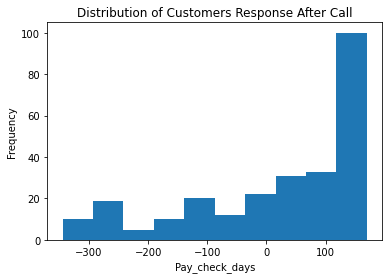

In [32]:
reached['pay_check_days'].plot(kind = 'hist')
plt.title('Distribution of Customers Response After Call')
plt.xlabel('Pay_check_days')

#### Customers That Responded within 30 days of being reached out to

In [33]:
Xdays = reached[(reached['pay_check_days'] >= 0) & (reached['pay_check_days'] <= 30)]

In [34]:
Xdays['pay_check_days'].value_counts()

28.0    2
18.0    2
24.0    2
22.0    2
3.0     1
29.0    1
16.0    1
0.0     1
9.0     1
27.0    1
25.0    1
4.0     1
6.0     1
Name: pay_check_days, dtype: int64

In [35]:
Xdays_2 = reached[(reached['pay_check_days'] >= 30) & (reached['pay_check_days'] <= 100)]

#### Customers That Responded within 100 days of being reached out to

In [36]:
Xdays_2['pay_check_days'].value_counts()

82.0     3
65.0     3
80.0     2
93.0     2
53.0     2
97.0     2
79.0     2
98.0     1
73.0     1
96.0     1
51.0     1
42.0     1
88.0     1
59.0     1
49.0     1
45.0     1
87.0     1
34.0     1
69.0     1
72.0     1
39.0     1
36.0     1
64.0     1
86.0     1
100.0    1
35.0     1
38.0     1
85.0     1
32.0     1
58.0     1
91.0     1
55.0     1
Name: pay_check_days, dtype: int64